<a href="https://colab.research.google.com/github/jinwoo3239/rdkit/blob/main/RDKIT_tutorial_rev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rdkit Tutorial (practice)
- laidd 강좌 (강원대 이주훈 교수 강의를 참고하였음. <https://laidd.org/my/lesson/course/111>



## introduction
- rdkit 설치
- 파일 일기

In [3]:
# rdkit install
!pip install DeepChem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# rdkit version

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.molSize = 150, 150

rdkit.__version__

'2022.03.5'

### Mol file  

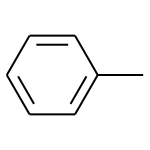

In [12]:
#Smiles > Mol
m = Chem.MolFromSmiles('Cc1ccccc1')
m

In [13]:
# Mol > Smiles
print(Chem.MolToSmiles(m)) # To caconical smiles
print(Chem.MolToSmiles(m, kekuleSmiles=True))

Cc1ccccc1
CC1=CC=CC=C1


--2022-08-11 11:35:50--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/input.mol
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1024 (1.0K) [text/plain]
Saving to: ‘input.mol.1’

input.mol.1         100%[===================>]   1.00K  --.-KB/s    in 0s      

2022-08-11 11:35:50 (44.6 MB/s) - ‘input.mol.1’ saved [1024/1024]



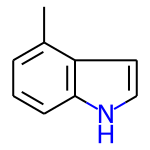

In [15]:
# mol file > mol
!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/input.mol

m = Chem.MolFromMolFile('input.mol')
m

--2022-08-11 11:38:08--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/5ht3ligs.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9578 (9.4K) [text/plain]
Saving to: ‘5ht3ligs.sdf.2’

5ht3ligs.sdf.2      100%[===================>]   9.35K  --.-KB/s    in 0s      

2022-08-11 11:38:08 (87.2 MB/s) - ‘5ht3ligs.sdf.2’ saved [9578/9578]



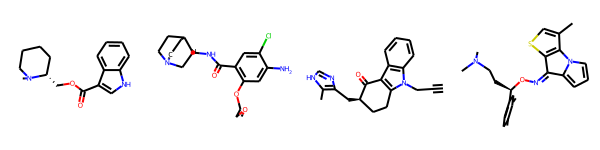

In [18]:
# sdf file > mol
# sdf file - $$$$ 이 구분자로, 여러개의 mol 분자들이 있음

!wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/5ht3ligs.sdf

suppl = Chem.SDMolSupplier('5ht3ligs.sdf')
mols = [mol for mol in suppl if mol is not None]

Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(150, 150))

--2022-08-11 11:44:50--  https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/actives_5ht3.sdf.gz [following]
--2022-08-11 11:44:50--  https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/actives_5ht3.sdf.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36077 (35K) [application/octet-stream]
Saving to: ‘actives_5ht3.sdf.gz.1’

actives_5ht3.sdf.gz 100%[===================>]  35.23K  --.-KB/s    in 0.003s  

2022-08-11 11:44:50 (10.4 MB/s) - ‘actives_5ht3.sdf.gz.1’ saved [3607

/usr/local/lib/python3.7/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:254: UserWarning: Truncating the list of molecules to be displayed to 4. Change the maxMols value to display more.
  % (maxMols))


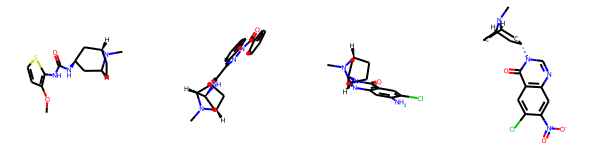

In [23]:
# gz file
import gzip

!wget https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz

fp = gzip.open('actives_5ht3.sdf.gz')
suppl = Chem.ForwardSDMolSupplier(fp)
mols = [mol for mol in suppl if mol is not None]

Chem.Draw.MolsToGridImage(mols, maxMols=4, molsPerRow=4, subImgSize=(150, 150))

c1ccncc1
c1ccncc1
c1ccncc1


### Export

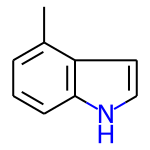

In [21]:
# Export

Chem.MolToMolFile(m, "test.mol")
Chem.MolFromMolFile('test.mol')

In [24]:
# save
# file 로 저장하기
with Chem.SDWriter('test_mols.sdf') as fout:
    for mol in mols:
        fout.write(mol)

### basic characteristic

In [25]:
# smiles > mol > caconical smiles
mol1 = Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1'))
mol2 = Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1'))
mol3 = Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1'))

print(mol1)
print(mol2)
print(mol3)

c1ccncc1
c1ccncc1
c1ccncc1


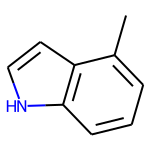

In [28]:
# Add H

mol = Chem.MolFromSmiles('Cc1cccc2[nH]ccc12')
mol

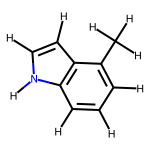

In [30]:
mol_H = Chem.AddHs(mol) # 보통 수소의 좌표는 입력되지 않음 (Chem.MolToMolBlock 으로 확인 가능)
mol_H

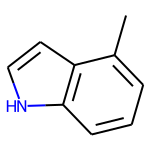

In [31]:
mol_H_removeH = Chem.RemoveHs(mol_H)
mol_H_removeH

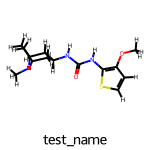

In [44]:
# Set proproties

mol_H.SetProp("_Name", 'test_name')
# print(Chem.MolToMolBlock(m_test))

Chem.Draw.MolToImage(mol_H, size=(150, 150), legend=mol_H.GetProp('_Name'))

'test_name'

## 구조 만들기

1.   항목 추가
2.   항목 추가



### 3차원 구조 만들기

- 분자의 3차원 구조 만들기
- 분자의 3차원 crystal 구조를 만드는 것은 매우 어려움
- 아주 정확한 3차원 구조를 얻기 위해서는 양자 계산 및 전역 최적화 (Global optimization)
- 회전 가능한 bond 의 수가 많은 수록 기하 급수적으로 늘어나게 됨...
- 3차원 구조를 만들어주는 알고리즘은, 어느 정도의 가정하고 만들게 됨... (정확하지 않음)

- RDkit 에서는 ETKDG
- AllChem.EmbedMolecule
- 입력 받은 변수를 inplace 변화를 일으킴


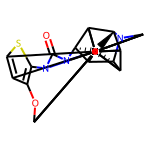

In [35]:
from rdkit.Chem import AllChem

mol = mols[0] #test_mols.sdf
mol_H = Chem.AddHs(mol)
mol_H # 수소의 좌표가 입력되지 않은 상태

In [36]:
# 3차원 구조로 만들기

AllChem.EmbedMolecule(mol_H) # 문제 없으면 0 을 return

0

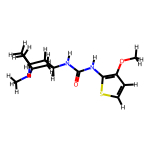

In [37]:
mol_H # MolToMolBlock 을 해보면 수소의 좌표가 입력되어 있는 것을 확인할 수 있음

In [38]:
print(Chem.MolToMolBlock(mol_H))

tpls\mol-1.tpl
     RDKit          3D

 41 43  0  0  0  0  0  0  0  0999 V2000
   -3.2477    0.0333   -1.6341 C   0  0  2  0  0  0  0  0  0  0  0  0
   -3.5614   -0.6266   -0.3905 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7722    0.3722   -1.6891 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.0795    1.2988   -1.5942 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4943    0.4722    0.5551 C   0  0  2  0  0  0  0  0  0  0  0  0
   -4.8329   -1.2725   -0.3870 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1730    0.1250   -0.3443 C   0  0  2  0  0  0  0  0  0  0  0  0
   -4.2942    1.5383   -0.1205 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0248    0.8488    0.6808 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1789    0.5563   -0.2038 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2636   -0.2823    0.1786 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5871    0.1608    0.3115 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.0007   -1.4856    0.4059 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.6165 

### 2차원 coordination

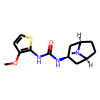

In [53]:
# 2d cordinate

AllChem.Compute2DCoords(mols[0])
Draw.MolToImage(mols[0], size=(100, 100))

## Fingerprint

In [ ]:
# !wget https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz

import gzip

fp = gzip.open('actives_5ht3.sdf.gz')
suppl = Chem.ForwardSDMolSupplier(fp)

mols = [mol for mol in suppl if mol is not None]

### Fingerprint_fun

In [47]:
# Fingerprint using RDKits

from rdkit import DataStructs

ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]

fps = [Chem.RDKFingerprint(mol) for mol in ms]
fps

In [50]:
# MACCSKeys - 166 public keys

from rdkit.Chem import MACCSkeys

fps = [MACCSkeys.GenMACCSKeys(mol) for mol in ms]
fps

In [51]:
# Morgan FingerPrints, 다른 말로 ECFP
# radius 를 확인해봐야함 1 - ECFP2, 2 - ECFP4

from rdkit.Chem import AllChem

fps = [AllChem.GetMorganFingerprint(mol, 2) for mol in ms]
fps

In [52]:
# 정수 list 가 아니라 bit vector 로 변환하여 보통 사용

fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in ms]
fps

### Smiliarity
- 특정 분자와 매우 유사한 것들만 고르겠다... 이런 것에 이용 한다

In [48]:
# Similarity

from rdkit import DataStructs

ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]
fps = [Chem.RDKFingerprint(mol) for mol in ms]

DataStructs.FingerprintSimilarity(fps[0], fps[1]) # Taminoto smiliary

0.6

In [49]:
DataStructs.FingerprintSimilarity(fps[0], fps[1], metric=DataStructs.DiceSimilarity)

0.75

In [ ]:
DataStructs.FingerprintSimilarity(fps[0], fps[1], )

In [54]:
# 최대한 다른 10 개의 다른 구조를 뽑는 방법

# !wget https://github.com/rdkit/rdkit/raw/master/Docs/Book/data/actives_5ht3.sdf.gz

import gzip

fp = gzip.open('actives_5ht3.sdf.gz')
suppl = Chem.ForwardSDMolSupplier(fp)

mols = [mol for mol in suppl if mol is not None]

In [56]:
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker

# 180 개 에서 최대한 다른 10개의 분자를 뽑아 내는 방법

fps = [GetMorganFingerprint(mol, 3) for mol in mols]

# define the disfunc

def dist_fun(i, j, fps=fps):
    return 1 - DataStructs.DiceSimilarity(fps[i], fps[j])


picker = MaxMinPicker()
pickIndices = picker.LazyPick(dist_fun, len(fps), 10, seed=100)
pickIndices

In [58]:
pick_list = sorted(list(pickIndices))
pick_list

[6, 12, 41, 57, 97, 99, 130, 137, 151, 158]

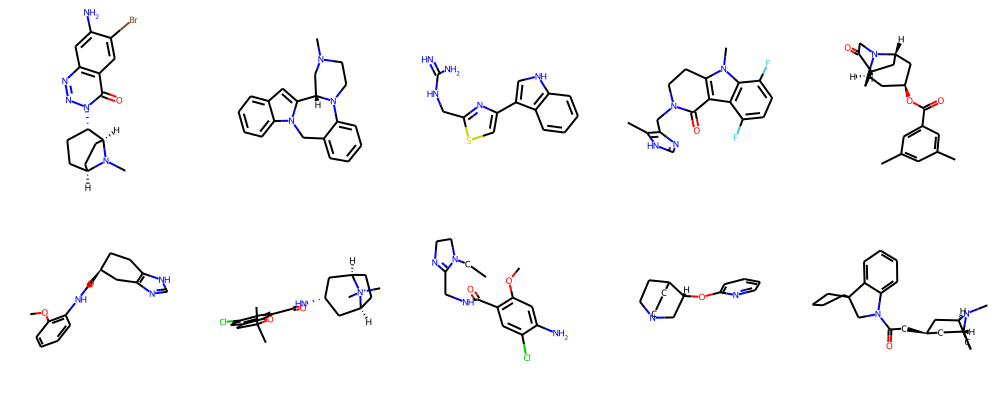

In [59]:
pick_mol = [mols[i] for i in pick_list]

Draw.MolsToGridImage(pick_mol, molsPerRow=5)

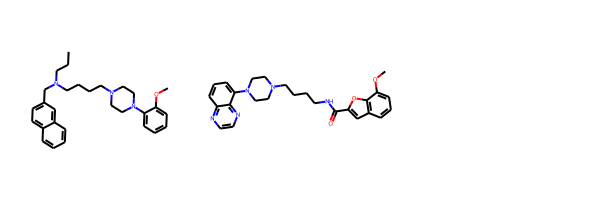

In [60]:
# Similarity map

mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

Draw.MolsToGridImage([refmol, mol])

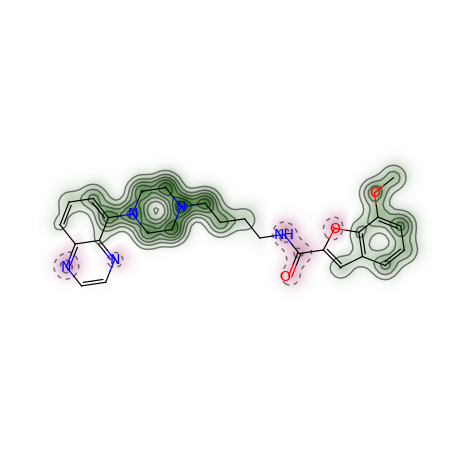

In [75]:
from rdkit.Chem.Draw import SimilarityMaps

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

# _, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, 
#                                         lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2)) 

# Description

- Descriptor calculation

- 두 군데의 submodule 안에 들어 있음
- rdkit.Chem.Descriptors, rdMolDescriptors
- rdMolDescriptors 안에 더 많은 함수가 들어 있음